In [ ]:
# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 
# Install Folium for Geographic data visualization
!pip install folium
# Install plotlyExpress
!pip install plotly_express

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
python3-gdal is already the newest version (2.2.3+dfsg-2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-rtree is already the newest version (0.8.3+ds-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-ytrh5gkb
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-ytrh5gkb


In [ ]:
! git clone https://github.com/CityScope/CSL_HCMC/

fatal: destination path 'CSL_HCMC' already exists and is not an empty directory.


In [ ]:
! ls


CSL_HCMC		       Population_Ward_Level.shp  sample_data
Population_District_Level.shp  Population_Ward_Level.shx


In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib
import matplotlib.pyplot as plt 
import folium
import plotly_express as px

In [ ]:
data = gpd.read_file('/content/CSL_HCMC/Data/GIS/Population/population_HCMC/population_shapefile/Population_District_Level.shp')

In [ ]:
data.head()

,Dist_Name,Dist_ID,Level,Pop_2009,Pop_2010,Pop_2011,Pop_2012,Pop_2013,Pop_2014,Pop_2015,Pop_2016,Pop_2017,Pop_2019,Den_2009,Den_2010,Den_2011,Den_2012,Den_2013,Den_2014,Den_2015,Den_2016,Den_2017,Den_2019,Shape_Leng,Shape_Area,geometry
0,District 1,760,District,180225.0,187435.0,187419.0,190943.0,197421.0,200297.0,193632.0,208475.0,211220.0,142625.0,23360.40,24294.90,24292.90,24749.60,25589.30,25962.10,25098.20,27022.1,27377.90,18486.8,15274.835115,7.714899e+06,"POLYGON ((684948.318 1193882.223, 684971.256 1..."
1,District 3,770,District,190553.0,188945.0,190631.0,191580.0,193206.0,193694.0,196333.0,198104.0,199095.0,190375.0,38688.60,38362.10,38704.40,38897.10,39227.20,39326.30,39862.10,40221.7,40422.90,38652.5,12182.058264,4.925215e+06,"POLYGON ((684382.122 1193521.050, 684410.753 1..."
2,District 4,773,District,180980.0,183261.0,184711.0,185649.0,185808.0,187157.0,186727.0,186995.0,183894.0,175329.0,43311.10,43857.00,44204.00,44428.40,44466.50,44789.30,44686.40,44750.6,44008.40,41958.7,9483.716891,4.178668e+06,"POLYGON ((687625.438 1189132.516, 687615.280 1..."
3,District 6,775,District,249329.0,253474.0,254212.0,257865.0,266121.0,257183.0,258945.0,260742.0,262757.0,233561.0,34910.50,35490.80,35594.20,36105.70,37261.60,36010.20,36256.90,36508.5,36790.60,32702.7,13077.365262,7.140945e+06,"POLYGON ((679534.413 1187518.498, 679077.904 1..."
4,District 7,778,District,244276.0,274828.0,268483.0,266633.0,280743.0,296757.0,310178.0,317488.0,327223.0,360155.0,6929.39,7796.06,7616.07,7563.59,7963.85,8418.12,8798.84,9006.2,9282.35,10216.5,33260.915360,3.525220e+07,"POLYGON ((691506.715 1190058.151, 691359.893 1..."


In [ ]:
data.shape

(24, 26)

In [ ]:
pop_2019=data['Pop_2019']
pop_2009=data['Pop_2009']

In [ ]:
pop_2019_max_idx=pop_2019.idxmax()
pop_2019_min_idx=pop_2019.idxmin()

In [ ]:
com_name=data['Com_Name']
district=data['Dist_Name']

In [ ]:
print(f"Highet Ward population: {com_name[pop_2019_max_idx]}, {district[pop_2019_max_idx]}")
print(f"Lowest Ward population: {com_name[pop_2019_min_idx]}, {district[pop_2019_min_idx]}")

Highet Ward population: Vinh Loc A, Binh Chanh
Lowest Ward population: An Khanh, District 2


In [ ]:
shape_area=data['Shape_Area']
shape_area_min_idx=shape_area.idxmin()
shape_area_max_idx=shape_area.idxmax()

In [ ]:
print(f"Highet Area Ward: {com_name[shape_area_max_idx]}, {district[shape_area_max_idx]}")
print(f"Lowest Area Ward: {com_name[shape_area_min_idx]}, {district[shape_area_min_idx]}")

Highet Area Ward: Ly Nhon, Can Gio
Lowest Area Ward: Ward 3, District 10


In [ ]:
delta_pop=pop_2019-pop_2009

In [ ]:
delta_density=delta_pop/pop_2009
delta_density_idx_max=delta_density.idxmax()
delta_density_idx_min=delta_density.idxmin()

In [ ]:
print(f"Highest delta density population: {com_name[delta_density_idx_max]}, {district[delta_density_idx_max]}")
print(f"Highest delta density population: {com_name[delta_density_idx_min]}, {district[delta_density_idx_min]}")

Highest delta density population: Phu Huu, District 9
Highest delta density population: An Khanh, District 2


In [ ]:
delta_idx_max=delta_pop.idxmax()
delta_idx_min=delta_pop.idxmin()

In [ ]:
print(f"Highest Ward delta population: {com_name[delta_idx_max]}, {district[delta_idx_max]}")
print(f"Highest Ward delta population: {com_name[delta_idx_min]},  {district[delta_idx_min]}")

Highest Ward delta population: Vinh Loc A, Binh Chanh
Highest Ward delta population: An Khanh,  District 2


In [ ]:
density=data['Den_2019']
density_idx_max=density.idxmax()
density_idx_min=density.idxmin()

In [ ]:
print(f"Highest density: {com_name[density_idx_max]}, {district[density_idx_max]}")
print(f"Lowest density: {com_name[density_idx_min]}, {district[density_idx_min]}")

Highest density: Ward 8, District 4
Lowest density: Ly Nhon, Can Gio


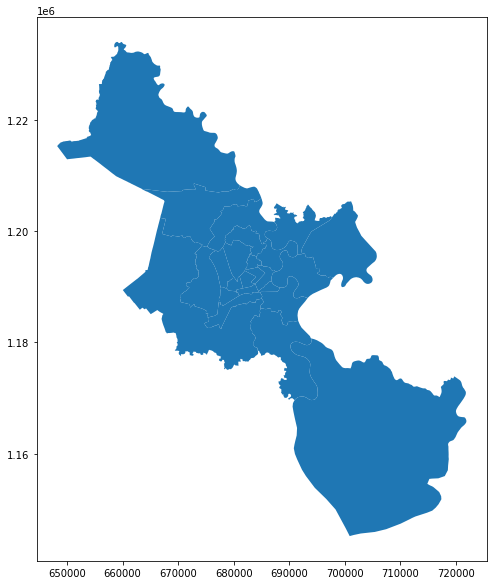

In [ ]:
data.plot(figsize=(10,10))

In [ ]:
data1 = data.to_crs(epsg=4326)

In [ ]:
m = folium.Map(location=[10.70, 106.94], zoom_start=10, tiles='CartoDB positron')
m

In [ ]:
for _, r in data1.iterrows():
    # Without simplifying the representation of each borough,
    # the map might not be displayed
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'orange'})
    folium.Popup(r['Dist_Name']).add_to(geo_j)
    geo_j.add_to(m)
m

In [ ]:
data1['centroid'] = data1.centroid

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




In [ ]:
for _, r in data1.iterrows():
    lat = r['centroid'].y
    lon = r['centroid'].x
    folium.Marker(location=[lat, lon],
                  popup='length: {} <br> area: {}'.format(r['Shape_Leng'], r['Shape_Area'])).add_to(m)

m